In [ ]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import PassiveAggressiveClassifier

import statistics

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV # Grid Search

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# ler um df
df = pd.read_csv("/content/winequality-red.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
print(df.shape)
print(df[df["quality"] >= 6].shape)
print(df[df["quality"] < 6].shape)

df.loc[df['quality'] >= 6, 'is_good'] = 1
df.loc[df['quality'] < 6, 'is_good'] = 0

df.drop(columns=["quality"], inplace=True)

df.head()

(1599, 12)
(855, 12)
(744, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0


In [ ]:
# apply normalization technique

df_norm = df.drop(columns=["is_good"])

for column in df_norm.columns:
  df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())

df_norm["is_good"] = df["is_good"]

print(df_norm.shape)
df_norm.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_good
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0


In [ ]:
# dividir em x e y

'''
X -> Entradas do modelo
...attriutes
y -> saída do modelo
is_good
'''

X = df_norm.drop(columns=["is_good"])
y = df_norm["is_good"]

# dividir 80 - 20 treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RF

In [ ]:
params = {
    "n_estimators": [50, 100, 150],
    "criterion": ["gini", "entropy", "log_loss"]
}
model = RandomForestClassifier()

gs = GridSearchCV(model, params, cv=10, verbose=1)

gs.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [50, 100, 150]},
             verbose=1)

In [ ]:
print(gs.best_params_)
print(gs.best_score_)

{'criterion': 'entropy', 'n_estimators': 150}
0.8233267716535433


In [ ]:
# rodando 30 vezes

best_params = gs.best_params_
model_30 = RandomForestClassifier(n_estimators=best_params['n_estimators'], criterion=best_params['criterion'])

acc_total = []
prec_total = []
recall_total = []
f1_total = []
for i in range(30):

  model_30.fit(X_train, y_train)

  y_pred = model_30.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  acc_total.append(acc)
  prec_total.append(prec)
  recall_total.append(recall)
  f1_total.append(f1)

In [ ]:
mean = statistics.mean(acc_total)
std_dev = statistics.stdev(acc_total)

print("acc Mean:", mean)
print("acc Standard deviation:", std_dev)

mean = statistics.mean(prec_total)
std_dev = statistics.stdev(prec_total)

print("prec Mean:", mean)
print("prec Standard deviation:", std_dev)

mean = statistics.mean(recall_total)
std_dev = statistics.stdev(recall_total)

print("recall Mean:", mean)
print("recall Standard deviation:", std_dev)

mean = statistics.mean(f1_total)
std_dev = statistics.stdev(f1_total)

print("f1 Mean:", mean)
print("f1 Standard deviation:", std_dev)

acc Mean: 0.7970833333333334
acc Standard deviation: 0.009245999445550842
prec Mean: 0.8179897894339528
prec Standard deviation: 0.009480340661134606
recall Mean: 0.8197392923649907
recall Standard deviation: 0.012268884626131436
f1 Mean: 0.8188068260907488
f1 Standard deviation: 0.008489559925232617


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(103, 38, 34, 145)

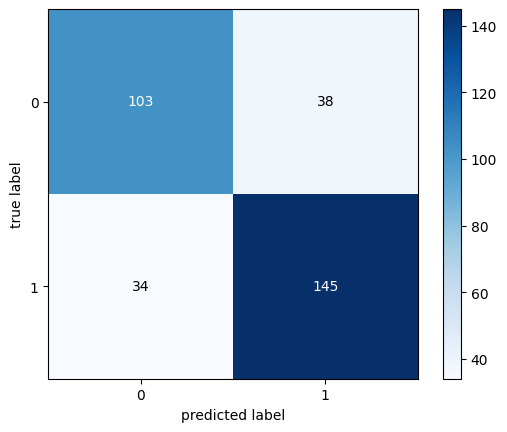

In [ ]:
binary = np.array([[103,  38],
       [ 34, 145]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=False,
                                colorbar=True)
plt.show()

DT

In [ ]:
# descobrindo melhor config
params = {
    "splitter": ['best', 'random'],
    "criterion": ["gini", "entropy", "log_loss"]
}
model = DecisionTreeClassifier()

gs = GridSearchCV(model, params, cv=10, verbose=1)

gs.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
print(gs.best_params_)
print(gs.best_score_)

{'criterion': 'entropy', 'splitter': 'random'}
0.7646468996062993


In [ ]:
# rodando 30 vezes

best_params = gs.best_params_
model_30 = DecisionTreeClassifier(splitter=best_params['splitter'], criterion=best_params['criterion'])

acc_total = []
prec_total = []
recall_total = []
f1_total = []
for i in range(30):

  model_30.fit(X_train, y_train)

  y_pred = model_30.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  acc_total.append(acc)
  prec_total.append(prec)
  recall_total.append(recall)
  f1_total.append(f1)

In [ ]:
mean = statistics.mean(acc_total)
std_dev = statistics.stdev(acc_total)

print("acc Mean:", mean)
print("acc Standard deviation:", std_dev)

mean = statistics.mean(prec_total)
std_dev = statistics.stdev(prec_total)

print("prec Mean:", mean)
print("prec Standard deviation:", std_dev)

mean = statistics.mean(recall_total)
std_dev = statistics.stdev(recall_total)

print("recall Mean:", mean)
print("recall Standard deviation:", std_dev)

mean = statistics.mean(f1_total)
std_dev = statistics.stdev(f1_total)

print("f1 Mean:", mean)
print("f1 Standard deviation:", std_dev)

acc Mean: 0.7411458333333333
acc Standard deviation: 0.02264029734647453
prec Mean: 0.7694118438597787
prec Standard deviation: 0.018502526107742095
recall Mean: 0.7672253258845437
recall Standard deviation: 0.03137468658994569
f1 Mean: 0.7680971853516031
f1 Standard deviation: 0.022107612477204802


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(103, 38, 51, 128)

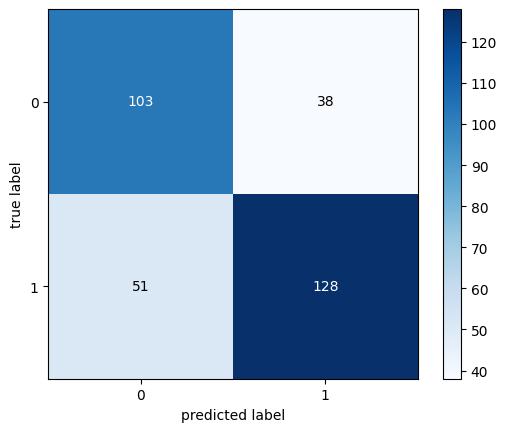

In [ ]:
binary = np.array([[103,  38],
       [ 51, 128]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=False,
                                colorbar=True)
plt.show()

ExtraTrees

In [ ]:
# descobrindo melhor config
params = {
    "n_estimators": [50, 100, 150],
    "criterion": ["gini", "entropy", "log_loss"]
}
model = ExtraTreesClassifier()

gs = GridSearchCV(model, params, cv=10, verbose=1)

gs.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [50, 100, 150]},
             verbose=1)

In [ ]:
print(gs.best_params_)
print(gs.best_score_)

{'criterion': 'log_loss', 'n_estimators': 100}
0.8249015748031496


In [ ]:
# rodando 30 vezes

best_params = gs.best_params_
model_30 = ExtraTreesClassifier(n_estimators=best_params['n_estimators'], criterion=best_params['criterion'])

acc_total = []
prec_total = []
recall_total = []
f1_total = []
for i in range(30):

  model_30.fit(X_train, y_train)

  y_pred = model_30.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  acc_total.append(acc)
  prec_total.append(prec)
  recall_total.append(recall)
  f1_total.append(f1)

In [ ]:
mean = statistics.mean(acc_total)
std_dev = statistics.stdev(acc_total)

print("acc Mean:", mean)
print("acc Standard deviation:", std_dev)

mean = statistics.mean(prec_total)
std_dev = statistics.stdev(prec_total)

print("prec Mean:", mean)
print("prec Standard deviation:", std_dev)

mean = statistics.mean(recall_total)
std_dev = statistics.stdev(recall_total)

print("recall Mean:", mean)
print("recall Standard deviation:", std_dev)

mean = statistics.mean(f1_total)
std_dev = statistics.stdev(f1_total)

print("f1 Mean:", mean)
print("f1 Standard deviation:", std_dev)

acc Mean: 0.8058333333333333
acc Standard deviation: 0.00966621456532951
prec Mean: 0.822073776756305
prec Standard deviation: 0.009636836017284899
recall Mean: 0.8333333333333334
recall Standard deviation: 0.012105517869926762
f1 Mean: 0.8276162677432817
f1 Standard deviation: 0.008801172931541519


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(109, 32, 30, 149)

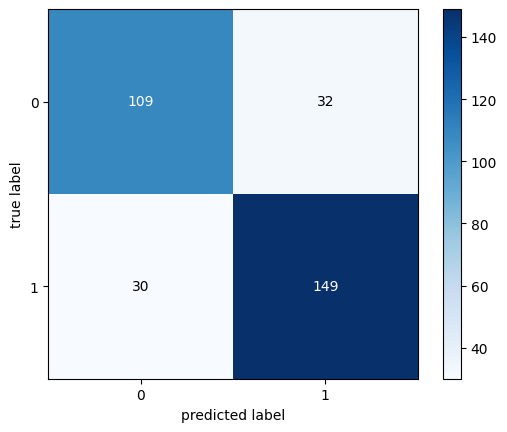

In [ ]:
binary = np.array([[109,  32],
       [ 30, 149]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=False,
                                colorbar=True)
plt.show()

KNN

In [ ]:
# descobrindo melhor config
params = {
    "n_neighbors": [3, 5, 7],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
}
model = KNeighborsClassifier()

gs = GridSearchCV(model, params, cv=10, verbose=1)

gs.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7]},
             verbose=1)

In [ ]:
print(gs.best_params_)
print(gs.best_score_)

{'algorithm': 'auto', 'n_neighbors': 7}
0.7216966043307087


In [ ]:
# rodando 30 vezes

best_params = gs.best_params_
model_30 = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], algorithm=best_params['algorithm'])

acc_total = []
prec_total = []
recall_total = []
f1_total = []
for i in range(30):

  model_30.fit(X_train, y_train)

  y_pred = model_30.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  acc_total.append(acc)
  prec_total.append(prec)
  recall_total.append(recall)
  f1_total.append(f1)

In [ ]:
mean = statistics.mean(acc_total)
std_dev = statistics.stdev(acc_total)

print("acc Mean:", mean)
print("acc Standard deviation:", std_dev)

mean = statistics.mean(prec_total)
std_dev = statistics.stdev(prec_total)

print("prec Mean:", mean)
print("prec Standard deviation:", std_dev)

mean = statistics.mean(recall_total)
std_dev = statistics.stdev(recall_total)

print("recall Mean:", mean)
print("recall Standard deviation:", std_dev)

mean = statistics.mean(f1_total)
std_dev = statistics.stdev(f1_total)

print("f1 Mean:", mean)
print("f1 Standard deviation:", std_dev)

acc Mean: 0.709375
acc Standard deviation: 0.0
prec Mean: 0.7362637362637363
prec Standard deviation: 0.0
recall Mean: 0.7486033519553073
recall Standard deviation: 0.0
f1 Mean: 0.7423822714681442
f1 Standard deviation: 0.0


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(93, 48, 45, 134)

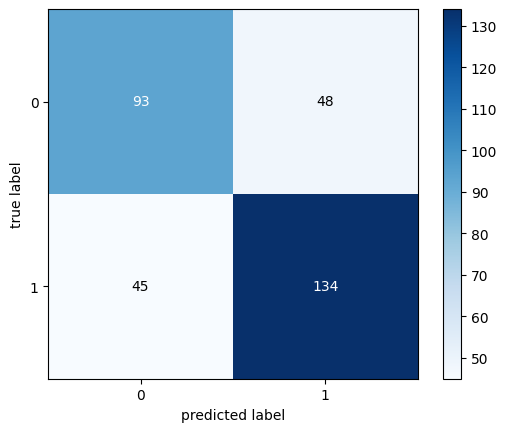

In [ ]:
binary = np.array([[ 93,  48],
       [ 45, 134]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=False,
                                colorbar=True)
plt.show()

LDA

In [ ]:
# descobrindo melhor config
params = {
    "solver": ["svd", "lsqr", "eigen"]
}
model = LinearDiscriminantAnalysis()

gs = GridSearchCV(model, params, cv=10, verbose=1)

gs.fit(X_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen']}, verbose=1)

In [ ]:
print(gs.best_params_)
print(gs.best_score_)

{'solver': 'svd'}
0.7466966043307087


In [ ]:
# rodando 30 vezes

best_params = gs.best_params_
model_30 = LinearDiscriminantAnalysis(solver=best_params['solver'])

acc_total = []
prec_total = []
recall_total = []
f1_total = []
for i in range(30):

  model_30.fit(X_train, y_train)

  y_pred = model_30.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  acc_total.append(acc)
  prec_total.append(prec)
  recall_total.append(recall)
  f1_total.append(f1)

In [ ]:
mean = statistics.mean(acc_total)
std_dev = statistics.stdev(acc_total)

print("acc Mean:", mean)
print("acc Standard deviation:", std_dev)

mean = statistics.mean(prec_total)
std_dev = statistics.stdev(prec_total)

print("prec Mean:", mean)
print("prec Standard deviation:", std_dev)

mean = statistics.mean(recall_total)
std_dev = statistics.stdev(recall_total)

print("recall Mean:", mean)
print("recall Standard deviation:", std_dev)

mean = statistics.mean(f1_total)
std_dev = statistics.stdev(f1_total)

print("f1 Mean:", mean)
print("f1 Standard deviation:", std_dev)

acc Mean: 0.75
acc Standard deviation: 0.0
prec Mean: 0.8
prec Standard deviation: 0.0
recall Mean: 0.7374301675977654
recall Standard deviation: 0.0
f1 Mean: 0.7674418604651163
f1 Standard deviation: 0.0


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(108, 33, 47, 132)

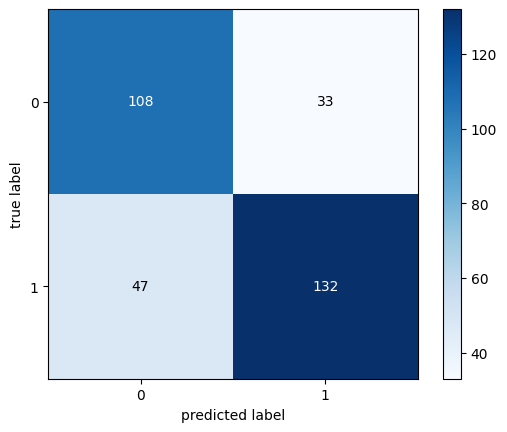

In [ ]:
binary = np.array([[108,  33],
       [ 47, 132]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=False,
                                colorbar=True)
plt.show()

QDA

In [ ]:
# descobrindo melhor config
params = {
    "reg_param": [0.1, 0.2, 0.3, 0.4, 0.5]
}
model = QuadraticDiscriminantAnalysis()

gs = GridSearchCV(model, params, cv=10, verbose=1)

gs.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=QuadraticDiscriminantAnalysis(),
             param_grid={'reg_param': [0.1, 0.2, 0.3, 0.4, 0.5]}, verbose=1)

In [ ]:
print(gs.best_params_)
print(gs.best_score_)

{'reg_param': 0.1}
0.7294537401574803


In [ ]:
# rodando 30 vezes

best_params = gs.best_params_
model_30 = QuadraticDiscriminantAnalysis(reg_param=best_params['reg_param'])

acc_total = []
prec_total = []
recall_total = []
f1_total = []
for i in range(30):

  model_30.fit(X_train, y_train)

  y_pred = model_30.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  acc_total.append(acc)
  prec_total.append(prec)
  recall_total.append(recall)
  f1_total.append(f1)

In [ ]:
mean = statistics.mean(acc_total)
std_dev = statistics.stdev(acc_total)

print("acc Mean:", mean)
print("acc Standard deviation:", std_dev)

mean = statistics.mean(prec_total)
std_dev = statistics.stdev(prec_total)

print("prec Mean:", mean)
print("prec Standard deviation:", std_dev)

mean = statistics.mean(recall_total)
std_dev = statistics.stdev(recall_total)

print("recall Mean:", mean)
print("recall Standard deviation:", std_dev)

mean = statistics.mean(f1_total)
std_dev = statistics.stdev(f1_total)

print("f1 Mean:", mean)
print("f1 Standard deviation:", std_dev)

acc Mean: 0.73125
acc Standard deviation: 0.0
prec Mean: 0.7540983606557377
prec Standard deviation: 0.0
recall Mean: 0.770949720670391
recall Standard deviation: 0.0
f1 Mean: 0.7624309392265193
f1 Standard deviation: 0.0


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(96, 45, 41, 138)

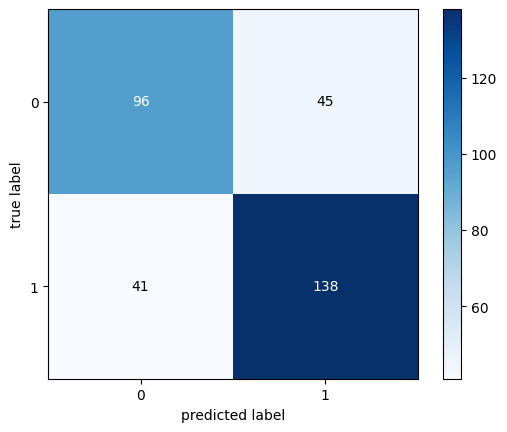

In [ ]:
binary = np.array([[ 96,  45],
       [ 41, 138]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=False,
                                colorbar=True)
plt.show()

PA

In [ ]:
# descobrindo melhor config
params = {
    "max_iter": [500, 1000, 1500, 2000],
    "C": [ 0.5, 1.0, 1.5, 1.8, 2.0]
}
model = PassiveAggressiveClassifier()

gs = GridSearchCV(model, params, cv=10, verbose=1)

gs.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=10, estimator=PassiveAggressiveClassifier(),
             param_grid={'C': [0.5, 1.0, 1.5, 1.8, 2.0],
                         'max_iter': [500, 1000, 1500, 2000]},
             verbose=1)

In [ ]:
print(gs.best_params_)
print(gs.best_score_)

{'C': 1.8, 'max_iter': 1000}
0.7076402559055118


In [ ]:
# rodando 30 vezes

best_params = gs.best_params_
model_30 = PassiveAggressiveClassifier(C=best_params['C'], max_iter=best_params['max_iter'])

acc_total = []
prec_total = []
recall_total = []
f1_total = []
for i in range(30):

  model_30.fit(X_train, y_train)

  y_pred = model_30.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  acc_total.append(acc)
  prec_total.append(prec)
  recall_total.append(recall)
  f1_total.append(f1)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
mean = statistics.mean(acc_total)
std_dev = statistics.stdev(acc_total)

print("acc Mean:", mean)
print("acc Standard deviation:", std_dev)

mean = statistics.mean(prec_total)
std_dev = statistics.stdev(prec_total)

print("prec Mean:", mean)
print("prec Standard deviation:", std_dev)

mean = statistics.mean(recall_total)
std_dev = statistics.stdev(recall_total)

print("recall Mean:", mean)
print("recall Standard deviation:", std_dev)

mean = statistics.mean(f1_total)
std_dev = statistics.stdev(f1_total)

print("f1 Mean:", mean)
print("f1 Standard deviation:", std_dev)

acc Mean: 0.6573958333333333
acc Standard deviation: 0.0972634845901916
prec Mean: 0.7332552757170134
prec Standard deviation: 0.18788678827403438
recall Mean: 0.6860335195530726
recall Standard deviation: 0.2873980168253441
f1 Mean: 0.6535609971444757
f1 Standard deviation: 0.21421931353328388


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(120, 21, 67, 112)

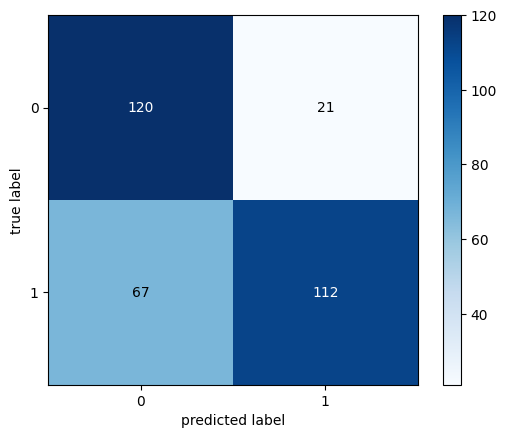

In [ ]:
binary = np.array([[120,  21],
       [ 67, 112]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=False,
                                colorbar=True)
plt.show()